In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import normaltest

In [2]:
# Load Dataset
fc_df = pd.read_csv('fulfilment_center_info.csv')
meal_df = pd.read_csv('meal_info.csv')
submission_df = pd.read_csv('sample_submission.csv')
train_df = pd.read_csv('train.csv')

In [3]:
fc_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
meal_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
submission_df.head()

#dataframe tidak digunakan lebih lanjut karena isi kolom num_orders semuanya 0

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0


In [6]:
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [7]:
# merge dataset for EDA
df = train_df.merge(meal_df, on='meal_id').merge(fc_df, on='center_id')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


DATA UNDERSTANDING  
id : Unique ID  
week : Week no  
center_id : Unique ID for fulfillment center  
meal_id : Unique ID for Meal  
checkout_price : Final price including discount, taxes & delivery charges  
base_price : Base price of the meal  
emailer_for_promotion : Emailer sent for promotion of meal  
homepage_featured : Meal featured at homepage  
num_orders : Orders Count (Target)  
category : Type of meal (beverages/snacks/soup/...)  
cuisine : Meal cuisine (Indian/Italian/…)  
city_code : Unique code for city  
region_code : Unique code for region  
center_type : Anonymized center type  
op_area : Area of operation (in km^2)



# Explanatory Data Analysis (EDA)

In [8]:
df.info() #no null data, namun beberapa data terlihat numerik padahal interpretasinya adalah sebagai object (non-numerik)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [19]:
df = df.astype({'week':object, 'center_id':object, 'meal_id':object, 'num_orders':int, 'city_code':object, 'region_code':object, 'emailer_for_promotion':object, 'homepage_featured':object})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  object 
 2   center_id              456548 non-null  object 
 3   meal_id                456548 non-null  object 
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  object 
 7   homepage_featured      456548 non-null  object 
 8   num_orders             456548 non-null  int32  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  object 
 12  region_code            456548 non-null  object 
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [10]:
# Describing numerical data
df.drop(columns='id').describe()

,checkout_price,base_price,op_area
count,456548.000000,456548.000000,456548.000000
mean,332.238933,354.156627,4.083590
std,152.939723,160.715914,1.091686
min,2.970000,55.350000,0.900000
25%,228.950000,243.500000,3.600000
50%,296.820000,310.460000,4.000000
75%,445.230000,458.870000,4.500000
max,866.270000,866.270000,7.000000


In [11]:
# Describing non numerical data
df.describe(include=object)

,week,center_id,meal_id,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type
count,456548,456548,456548,456548,456548,456548,456548,456548,456548,456548,456548
unique,145,77,51,2,2,1250,14,4,51,8,3
top,122,13,2290,0,0,13,Beverages,Italian,590,56,TYPE_A
freq,3359,7046,11138,419498,406693,12397,127890,122925,54746,191228,262881


- Rata-rata checkout price < rata-rata base price, kita bisa asumsikan customer aware dan paham penggunaan voucher discount. Metode ini dapat dipertimbangkan untuk upselling pada periode-periode tertentu
- Top selling product adalah beverages dan Italian cuisine
- City code 590 dan region code 56 merupakan area yang potensial untuk pengadaan event-event marketing karena memiliki penjualan yang tertinggi
- Emailer for promotion dan homepage featured dapat diasumsikan tidak memiliki efek signifikan, karena sebagian besar menu yang dipesan tidak terdapat pada email promosi maupun homepage
- Center type A merupakan center yang tersibuk dibandingkan center type B dan C. Hal ini bisa digunakan sebagai landasan untuk melakukan pembangunan fasilitas di center type A agar dapat megakomodir lebih banyak pesanan.

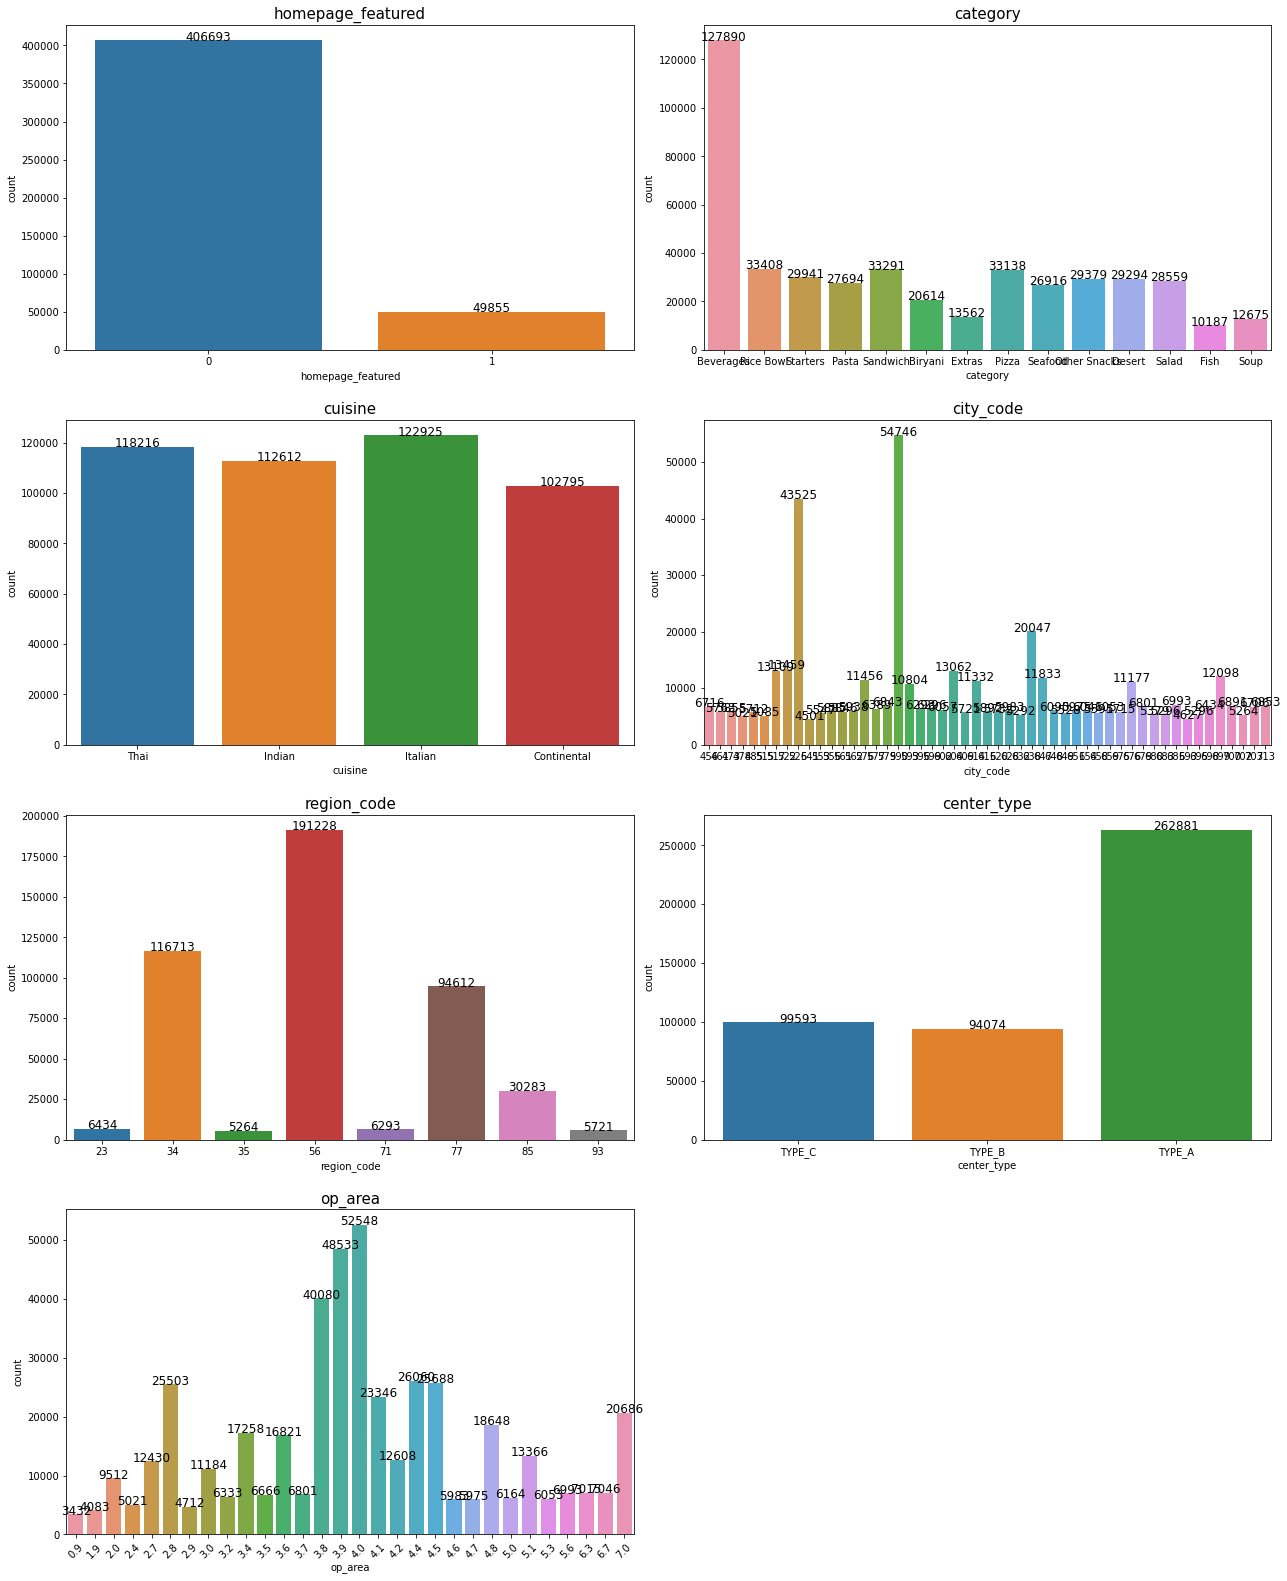

In [12]:
# Visualize data values
plt.figure(figsize=(18,27))
column_list = [
 'center_id',
 'meal_id',
 'emailer_for_promotion',
 'homepage_featured',
 'category',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area'] [3:12]
A = 0
for i in column_list:
    A+=1
    plt.subplot(5,2,A)
    ax = sns.countplot(data=df, x=i)
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)
    if A >= 7:
        plt.xticks(rotation=45)
plt.tight_layout(h_pad=2)

C:\Users\algustie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\algustie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


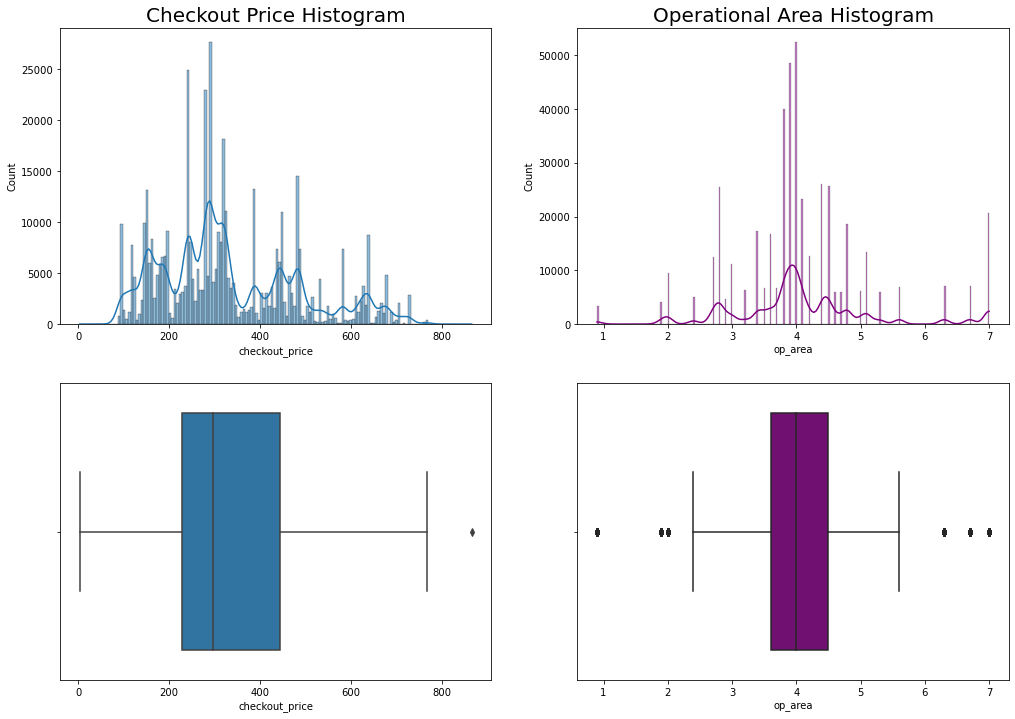

In [13]:
# Distribution of numerical data
plt.figure(figsize=(17,12))


plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['checkout_price'],kde=True)
plt.title('Checkout Price Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(df['op_area'],kde=True,color="purple")
plt.title('Operational Area Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(df['checkout_price'])

plt.subplot(224)
sns.boxplot(df['op_area'],color="purple")

plt.show()

In [14]:
# Distribution normality test
numerical_feature = ['checkout_price', 'base_price', 'op_area']

for i in numerical_feature:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        print(i, ': Normal distribution')
    else:
        print(i, ': Not normal distribution')

checkout_price : Not normal distribution
base_price : Not normal distribution
op_area : Not normal distribution


- Distribusi data-data numerik tidak mengikuti distribusi normal

In [15]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [24]:
df.groupby('week').mean()

,id,checkout_price,base_price,num_orders,op_area
week,,,,,
1,1.247659e+06,330.530205,348.516537,271.136550,4.079877
2,1.248203e+06,323.926944,347.299448,271.783149,4.085014
3,1.247274e+06,327.202580,347.827544,239.828217,4.078682
4,1.250912e+06,330.160502,348.372066,257.365524,4.087747
5,1.249198e+06,315.194676,350.148709,419.263729,4.077824
...,...,...,...,...,...
141,1.249765e+06,347.367882,358.118737,237.891511,4.091603
142,1.250767e+06,347.298610,357.043981,228.431439,4.097468
143,1.250228e+06,342.346188,361.157256,229.932224,4.077186


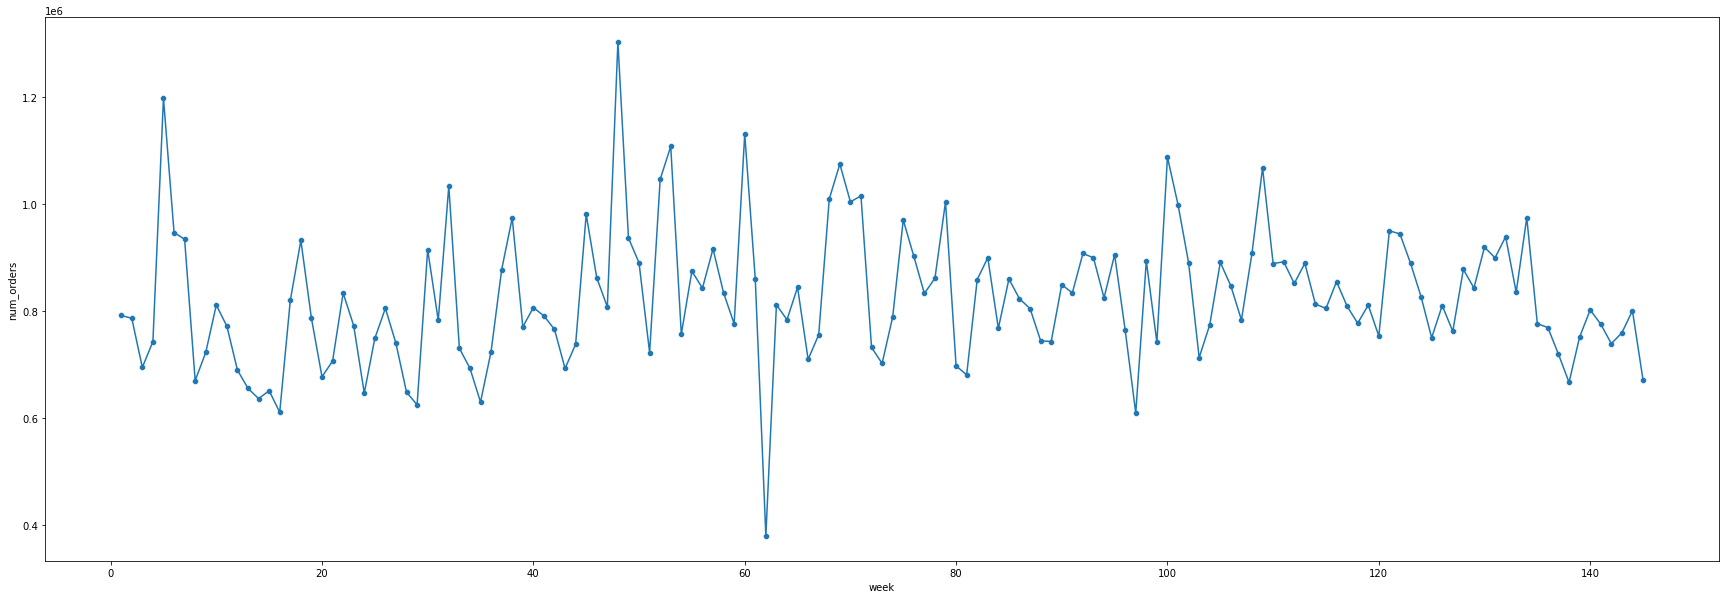

In [26]:
plt.figure(figsize=(30,10))
sns.scatterplot(x='week', y='num_orders', data=df.groupby('week').sum())
sns.lineplot(x='week', y='num_orders', data=df.groupby('week').sum())
plt.xticks()
plt.show()